In [1]:
# set the environment path to find Recommenders
import sys
sys.path.append("../../")

import pandas as pd
from reco_utils.dataset.wikidata import (
    find_wikidataID,
    query_entity_links,
    read_linked_entities,
    query_entity_description
)

## 1. Create a KG from linked entities in Wikidata from a list

In [2]:
name = ["The Godfather", "Al Pacino", "Tom Hanks", "Forrest Gump", "Julia Roberts", "fake movie", "My Best Friend's Wedding"]
result_linked = pd.DataFrame()

for n in name:
    entity_id = find_wikidataID(n)
    if entity_id != "entityNotFound":
        json_links = query_entity_links(entity_id)
        (related_entities,related_names) = read_linked_entities(json_links)
        d = pd.DataFrame({"original_entity":[entity_id]* len(related_entities),
                          "linked_entities":related_entities,
                          "name_linked_entities":related_names})
        result_linked = pd.concat([result_linked, d])

In [3]:
result_linked[1:10]

,original_entity,linked_entities,name_linked_entities
1,Q47703,Q130232,drama film
2,Q47703,Q52162262,film based on literature
3,Q47703,Q7444356,gangster film
4,Q47703,Q959790,crime film
5,Q47703,Q243556,The Godfather
6,Q47703,Q102642,Diane Keaton
7,Q47703,Q108622,Talia Shire
8,Q47703,Q1147417,Simonetta Stefanelli
9,Q47703,Q1352034,Lenny Montana


### Visualize KG using networkx

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.from_pandas_edgelist(result_linked, 'original_entity', 'linked_entities')

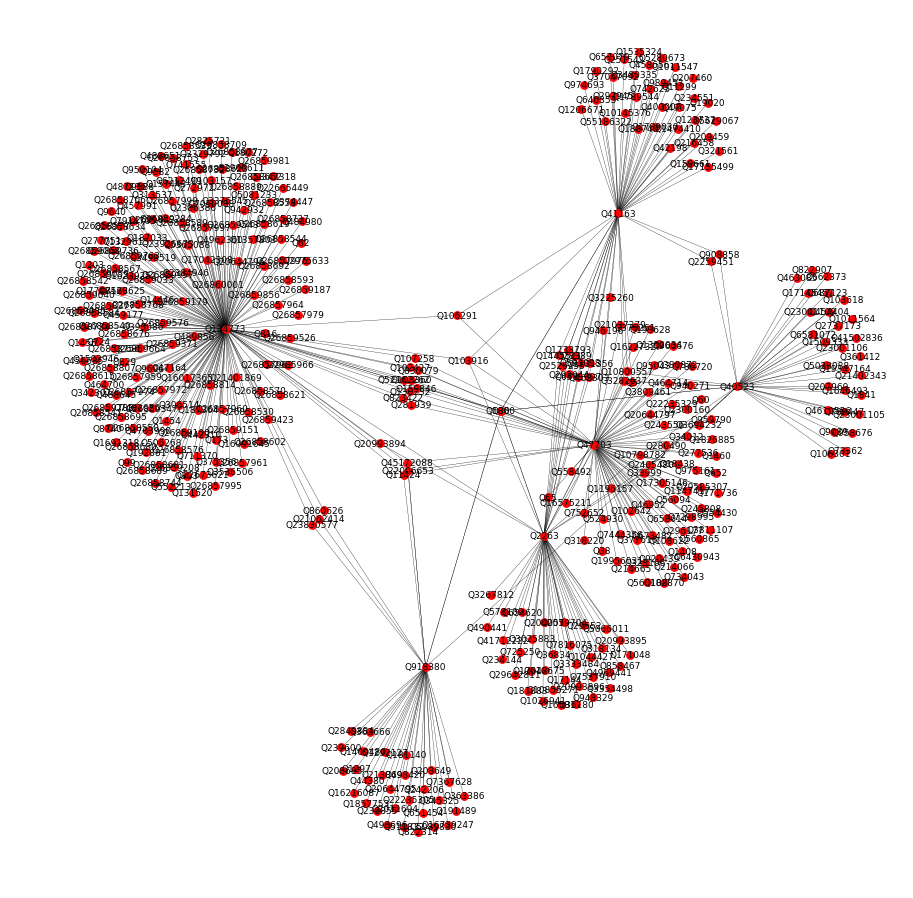

In [5]:
plt.figure(figsize=(12,12)) 
nx.draw(G, with_labels=True,node_size=60,font_size=9, width = 0.3)
plt.show()

## 2. Create an item description with short description and related entitites

In [6]:
# Create entity description with small description and string of linked entities
import pandas as pd
name = ["The Godfather", "Al Pacino", "Tom Hanks", "Forrest Gump", "Julia Roberts", "fake movie", "My Best Friend's Wedding"]
result_description = pd.DataFrame()

for n in name:
    entity_id = find_wikidataID(n)
    if entity_id != "entityNotFound":
        json_links = query_entity_links(entity_id)
        entity_description = query_entity_description(entity_id)
        (related_entities,related_names) = read_linked_entities(json_links)
        d = pd.DataFrame({"name": n,
                          "original_entity": entity_id,
                          "description":entity_description,
                          "related_names":', '.join(related_names)}, index = [0])
        result_description = pd.concat([result_description, d])

In [7]:
result_description.head(10)

,name,original_entity,description,related_names
0,The Godfather,Q47703,1972 US film directed by Francis Ford Coppola,"New Hollywood, drama film, film based on liter..."
0,Al Pacino,Q41163,American stage and film actor and director,"film actor, stage actor, film director, film p..."
0,Tom Hanks,Q2263,American actor and producer,"Democratic Party, television actor, film actor..."
0,Forrest Gump,Q134773,1994 American film directed by Robert Zemeckis,"drama film, comedy film, tragicomedy, flashbac..."
0,Julia Roberts,Q40523,American actress and producer,"television actor, film actor, stage actor, voi..."
0,My Best Friend's Wedding,Q918380,1997 film by P. J. Hogan,"melodrama, romantic comedy, Philip Bosco, Jose..."
